# import data

In [13]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

# Q1

# read dataset

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# visualize data in scatter plot

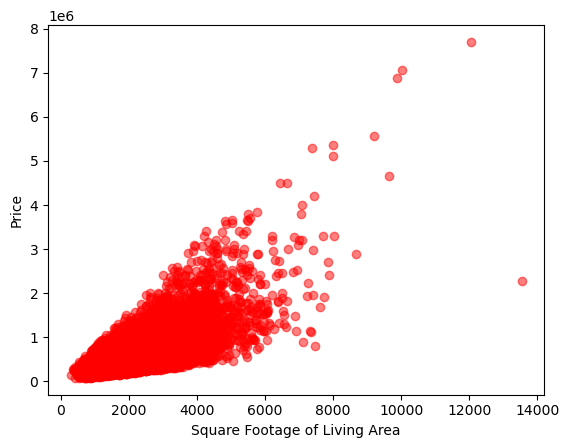

In [6]:
plt.scatter(df['sqft_living'], df['price'],alpha=0.5,color='red')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

# Q2

the square footage is so important to the point that can affect the price, the larger the living area is the higher the price get.
the location also affects the price which means the long the lat and the zipcode, play a great role in house pricing. 
more bedrooms and bathrooms can impact prices.
new built or recently renovated houses tend to have high values.
grade and condition also matter when it comes to prices,
view and waterfront too.


# Q3 split data into training and testing 

In [3]:
X = df.drop(columns=['date','id','price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q4

In [4]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# Q5

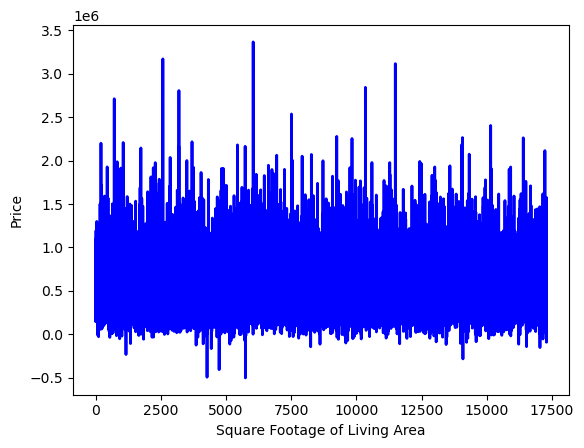

In [5]:
y_pred_train = model.predict(X_train)

plt.plot(y_pred_train, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

# Q6

In [21]:
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
print(f"mse: {mse:.2f}")

mse: 45173046132.79


In [11]:
model=LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 45173046132.79278
R squared 0.7011904448878239


# ?? same result

In [ ]:
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2)
X_ =poly.fit_transform(X)
print("x before transformation: ", X)
print("x after transformation: ", X_)
lg.fit(X_, y)

x before transformation:  [[1.0000000e+00 3.0000000e+00 1.0000000e+00 ... 1.7956000e+06
  7.5710000e+06 3.1922500e+07]
 [1.0000000e+00 3.0000000e+00 2.2500000e+00 ... 2.8561000e+06
  1.2909910e+07 5.8354321e+07]
 [1.0000000e+00 2.0000000e+00 1.0000000e+00 ... 7.3984000e+06
  2.1928640e+07 6.4995844e+07]
 ...
 [1.0000000e+00 2.0000000e+00 7.5000000e-01 ... 1.0404000e+06
  2.0471400e+06 4.0280490e+06]
 [1.0000000e+00 3.0000000e+00 2.5000000e+00 ... 1.9881000e+06
  1.8146700e+06 1.6563690e+06]
 [1.0000000e+00 2.0000000e+00 7.5000000e-01 ... 1.0404000e+06
  1.3841400e+06 1.8414490e+06]]
x after transformation:  [[1.00000000e+00 1.00000000e+00 3.00000000e+00 ... 5.73200410e+13
  2.41685248e+14 1.01904601e+15]
 [1.00000000e+00 1.00000000e+00 3.00000000e+00 ... 1.66665776e+14
  7.53349032e+14 3.40522678e+15]
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.80865252e+14
  1.42527046e+15 4.22445974e+15]
 ...
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.19078218e+12
  8.24598023e+12 